In [5]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

# Scenario

In this assignment you will be tasked with creating plots which answer questions for analysing "historical_automobile_sales" data to understand the historical trends in automobile sales during recession periods.<br>
recession period 1 - year 1980 <br>
recession period 2 - year 1981 to 1982<br>
recession period 3 - year 1991<br>
recession period 4 - year 2000 to 2001<br>
recession period 5 - year end 2007 to mid 2009<br>
recession period 6 - year 2020 -Feb to April (Covid-19 Impact)<br>

# Data Description

The dataset used for this visualization assignment contains *historical_automobile_sales* data representing automobile sales and related variables during recession and non-recession period. 

The dataset includes the following variables:
<br>1. Date: The date of the observation.
<br>2. Recession: A binary variable indicating recession perion; 1 means it was recession, 0 means it was normal.
<br>3. Automobile_Sales: The number of vehicles sold during the period.
<br>4. GDP: The per capita GDP value in USD.
<br>5. Unemployment_Rate: The monthly unemployment rate.
<br>6. Consumer_Confidence: A synthetic index representing consumer confidence, which can impact consumer spending and automobile purchases.
<br>7. Seasonality_Weight: The weight representing the seasonality effect on automobile sales during the period.
<br>8. Price: The average vehicle price during the period.
<br>9. Advertising_Expenditure: The advertising expenditure of the company.
<br>10.Vehicle_Type: The type of vehicles sold; Supperminicar, Smallfamiliycar,                 Mediumfamilycar, Executivecar, Sports.
<br>11.Competition: The measure of competition in the market, such as the number of competitors or market share of major manufacturers.
<br>12.Month: Month of the observation extracted from Date..
<br>13.Year: Year of the observation extracted from Date.
<br>
By examining various factors mentioned above from the dataset, you aim to gain insights into how recessions impacted automobile sales for your company.


# Importing Data


In [6]:
import requests
import io
import pandas as pd

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"

response = requests.get(URL)
response.raise_for_status()
csv_content = io.StringIO(response.text)

df = pd.read_csv(csv_content)

print('Data downloaded and read into a dataframe!')
print(df.head())


Data downloaded and read into a dataframe!
        Date  Year Month  Recession  Consumer_Confidence  Seasonality_Weight  \
0  1/31/1980  1980   Jan          1               108.24                0.50   
1  2/29/1980  1980   Feb          1                98.75                0.75   
2  3/31/1980  1980   Mar          1               107.48                0.20   
3  4/30/1980  1980   Apr          1               115.01                1.00   
4  5/31/1980  1980   May          1                98.72                0.20   

       Price  Advertising_Expenditure  Competition     GDP  Growth_Rate  \
0  27483.571                     1558            7  60.223     0.010000   
1  24308.678                     3048            4  45.986    -0.309594   
2  28238.443                     3137            3  35.141    -0.308614   
3  32615.149                     1653            7  45.673     0.230596   
4  23829.233                     1319            4  52.997     0.138197   

   unemployment_rate  Aut

In [7]:
df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


In [8]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

# Creating Visualizations for Data Analysis


### TASK 1.1: Develop a *Line chart* using the functionality of pandas to show how automobile sales fluctuate from year to year


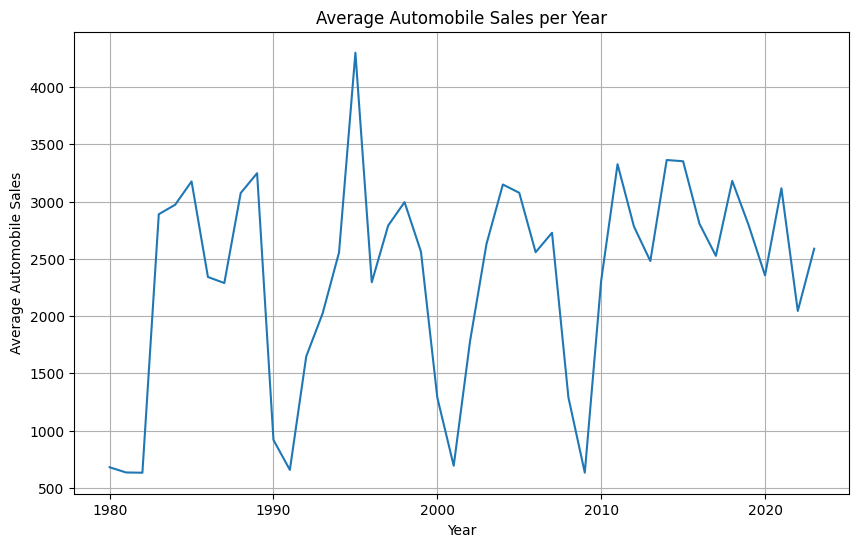

In [9]:
df_yearly = df.groupby("Year")["Automobile_Sales"].mean()
df_yearly.plot(kind="line", figsize=(10,6))

plt.title("Average Automobile Sales per Year")
plt.xlabel("Year")
plt.ylabel("Average Automobile Sales")
plt.grid(True)
plt.show()


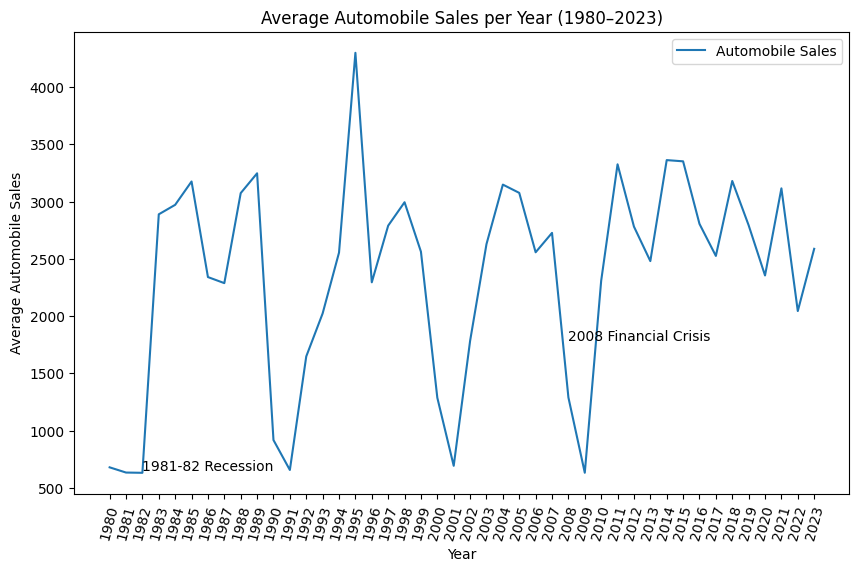

In [10]:
plt.figure(figsize=(10, 6))

df_line = df.groupby("Year")["Automobile_Sales"].mean()
df_line.plot(kind='line')

plt.xticks(list(range(1980, 2024)), rotation=75)
plt.xlabel("Year")
plt.ylabel("Average Automobile Sales")
plt.title("Average Automobile Sales per Year (1980–2023)")
plt.text(1982, 650, "1981-82 Recession")
plt.text(2008, df_line.loc[2008] + 500, "2008 Financial Crisis")
plt.legend(["Automobile Sales"])
plt.show()



####  TASK 1.2: Plot different lines for categories of vehicle type and analyse the trend to answer the question Is there a noticeable difference in sales trends between different vehicle types during recession periods?


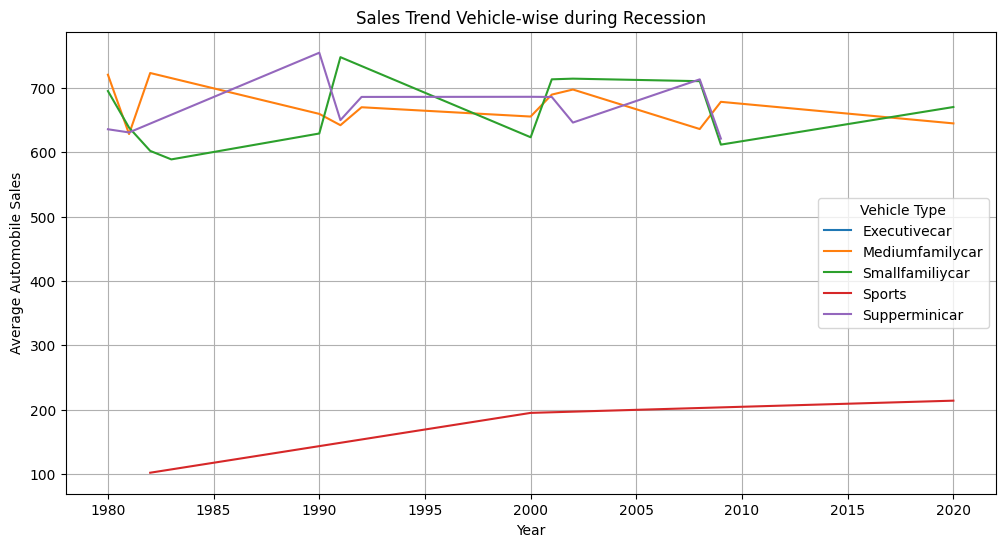

In [11]:
df_rec = df[df['Recession'] == 1]
df_Mline = df_rec.groupby(['Year', 'Vehicle_Type'], as_index=False)['Automobile_Sales'].mean()
df_Mline.set_index('Year', inplace=True)
df_Mline = df_Mline.groupby(['Vehicle_Type'])['Automobile_Sales']
df_Mline.plot(kind='line', figsize=(12,6))

plt.xlabel("Year")
plt.ylabel("Average Automobile Sales")
plt.title("Sales Trend Vehicle-wise during Recession")
plt.legend(title="Vehicle Type")
plt.grid(True)
plt.show()


### TASK 1.3: Use the functionality of **Seaborn Library** to create a visualization to compare the sales trend per vehicle type for a recession period with a non-recession period.


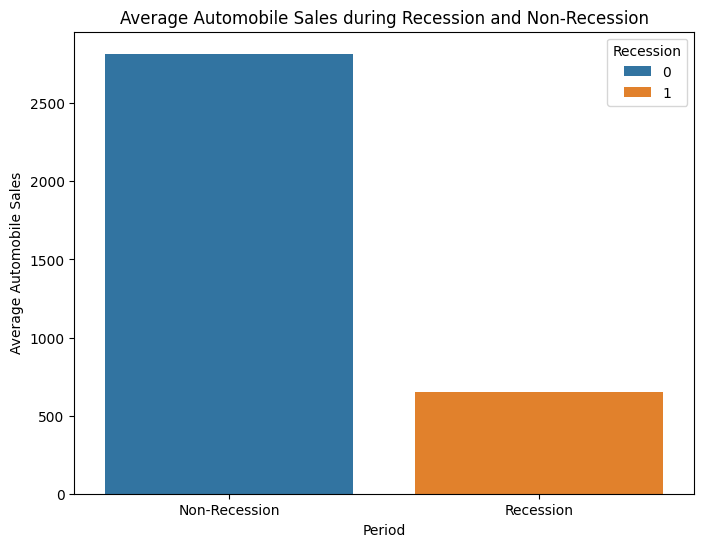

In [12]:
new_df = df.groupby('Recession')['Automobile_Sales'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(
    x='Recession', 
    y='Automobile_Sales', 
    hue='Recession', 
    data=new_df)

plt.xlabel('Period')
plt.ylabel('Average Automobile Sales')
plt.title('Average Automobile Sales during Recession and Non-Recession')
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.show()


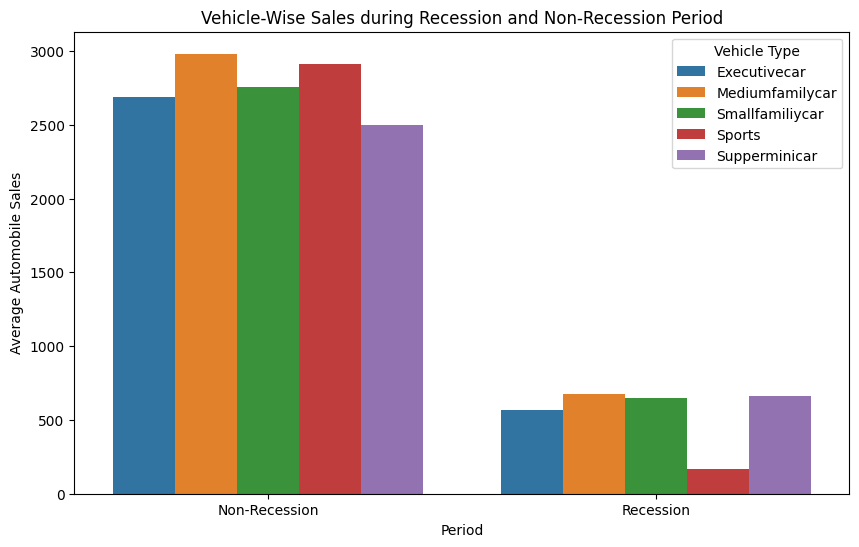

In [13]:
recession_data = df[df['Recession'] == 1]
dd = df.groupby(['Recession', 'Vehicle_Type'])['Automobile_Sales'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(
    x='Recession', 
    y='Automobile_Sales', 
    hue='Vehicle_Type', 
    data=dd)

plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.xlabel('Period')
plt.ylabel('Average Automobile Sales')
plt.title('Vehicle-Wise Sales during Recession and Non-Recession Period')
plt.legend(title="Vehicle Type")
plt.show()


### TASK 1.4: Use sub plotting to compare the variations in GDP during recession and non-recession period by developing line plots for each period.



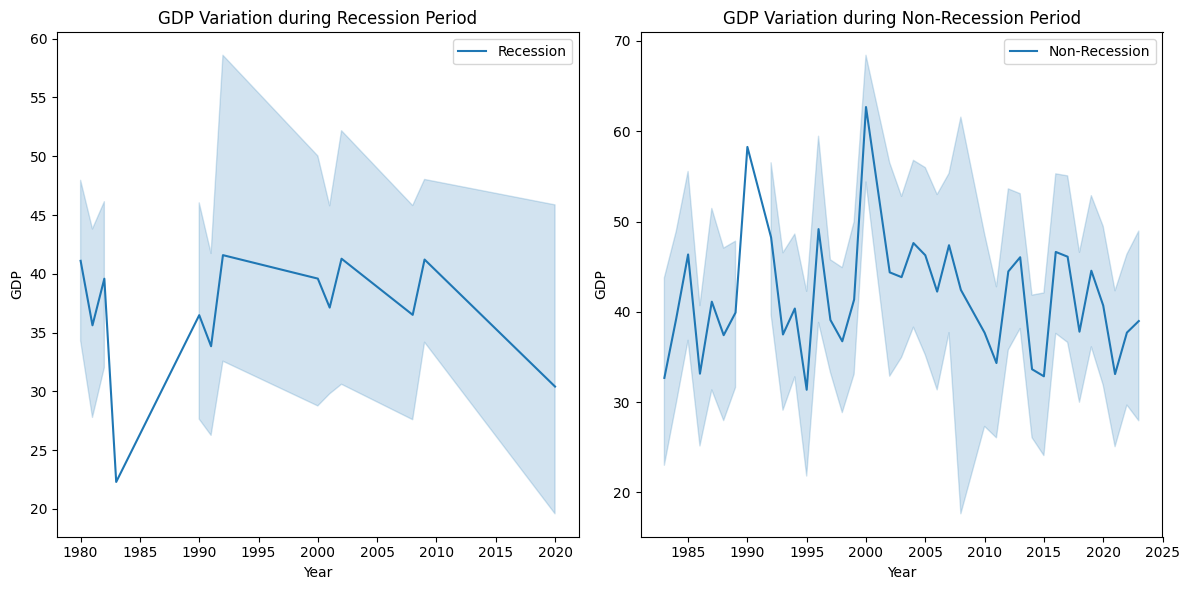

In [14]:
rec_data = df[df['Recession'] == 1]
non_rec_data = df[df['Recession'] == 0]

fig = plt.figure(figsize=(12, 6))

ax0 = fig.add_subplot(1, 2, 1)
sns.lineplot(
    x='Year', 
    y='GDP', 
    data=rec_data, 
    label='Recession', 
    ax=ax0)
ax0.set_xlabel('Year')
ax0.set_ylabel('GDP')
ax0.set_title('GDP Variation during Recession Period')

ax1 = fig.add_subplot(1, 2, 2)
sns.lineplot(
    x='Year', 
    y='GDP', 
    data=non_rec_data, 
    label='Non-Recession', 
    ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP')
ax1.set_title('GDP Variation during Non-Recession Period')

plt.tight_layout()
plt.show()


### TASK 1.5: Develop a Bubble plot for displaying the impact of seasonality on Automobile Sales.

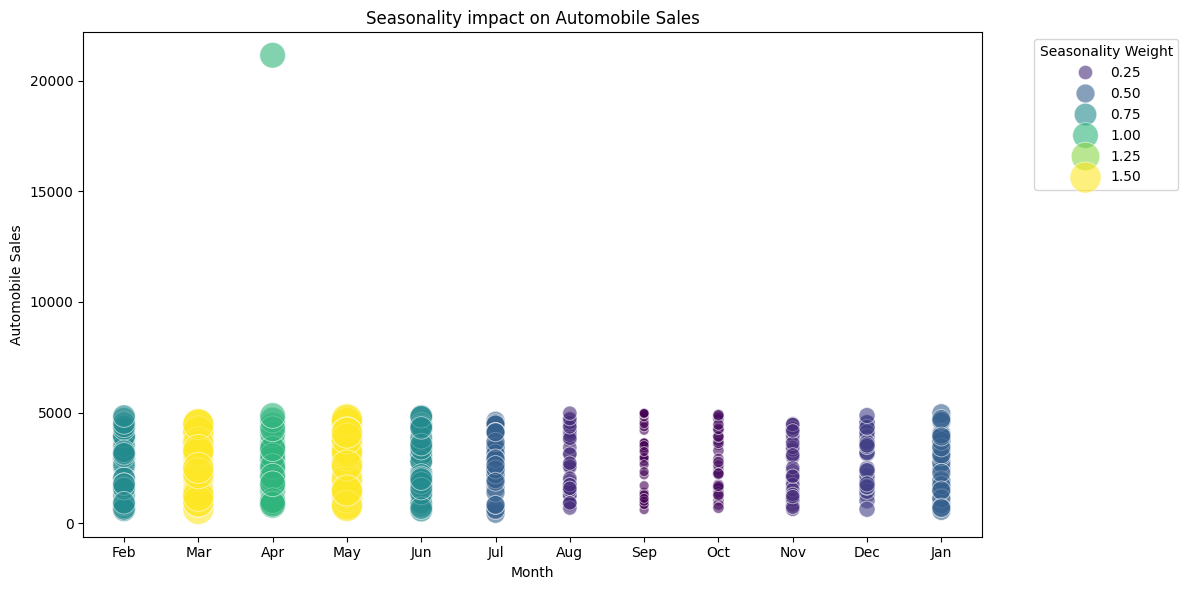

In [15]:
non_rec_data = df[df['Recession'] == 0]
size = non_rec_data['Seasonality_Weight']

plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=non_rec_data,
    x='Month',
    y='Automobile_Sales',
    size=size,
    hue='Seasonality_Weight',   # opsional, biar warna ikut seasonality
    sizes=(50, 500),
    alpha=0.6,
    palette='viridis'
)

plt.xlabel('Month')
plt.ylabel('Automobile Sales')
plt.title('Seasonality impact on Automobile Sales')
plt.legend(title="Seasonality Weight", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


 ### TASK 1.6: Use the functionality of Matplotlib to develop a scatter plot to identify the correlation between average vehicle price relate to the sales volume during recessions.


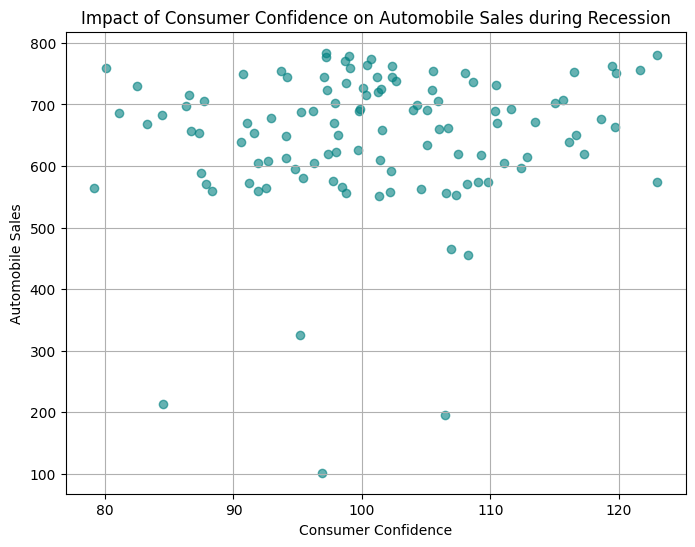

In [16]:
rec_data = df[df['Recession'] == 1]

plt.figure(figsize=(8, 6))
plt.scatter(rec_data['Consumer_Confidence'], rec_data['Automobile_Sales'], alpha=0.6, color='teal')
plt.xlabel('Consumer Confidence')
plt.ylabel('Automobile Sales')
plt.title('Impact of Consumer Confidence on Automobile Sales during Recession')
plt.grid(True)
plt.show()


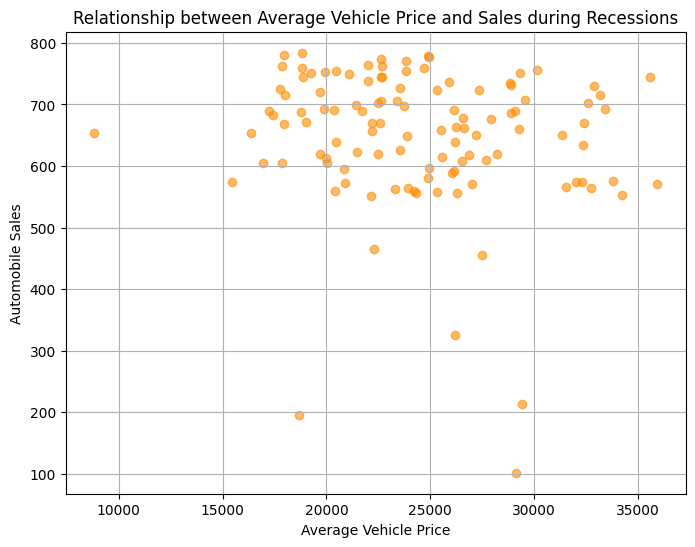

In [17]:
rec_data = df[df['Recession'] == 1]

plt.figure(figsize=(8, 6))
plt.scatter(rec_data['Price'], rec_data['Automobile_Sales'], alpha=0.6, color='darkorange')
plt.xlabel('Average Vehicle Price')
plt.ylabel('Automobile Sales')
plt.title('Relationship between Average Vehicle Price and Sales during Recessions')
plt.grid(True)
plt.show()


 ### TASK 1.7: Create a pie chart to display the portion of advertising expenditure of XYZAutomotives during recession and non-recession periods.

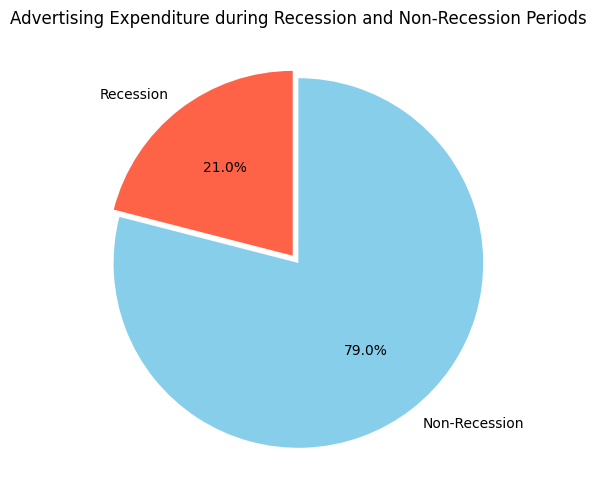

In [18]:
Rdata = df[df['Recession'] == 1]
NRdata = df[df['Recession'] == 0]

RAtotal = Rdata['Advertising_Expenditure'].sum()
NRAtotal = NRdata['Advertising_Expenditure'].sum()

plt.figure(figsize=(8, 6))

labels = ['Recession', 'Non-Recession']
sizes = [RAtotal, NRAtotal]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['tomato', 'skyblue'], explode=[0.05, 0])
plt.title('Advertising Expenditure during Recession and Non-Recession Periods')
plt.show()

### TASK 1.8: Develop a pie chart to display the total Advertisement expenditure for each vehicle type during recession period.


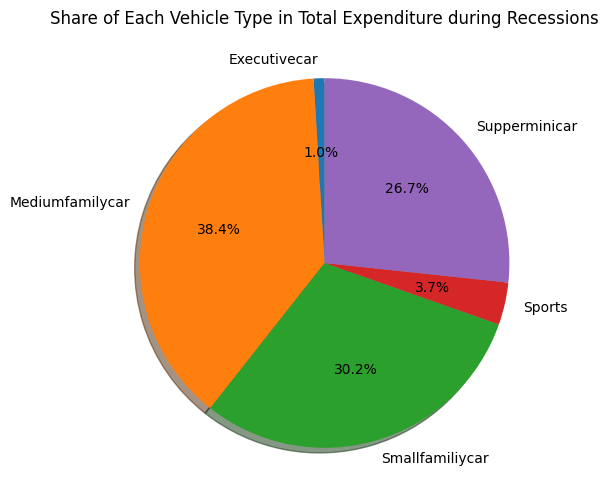

In [19]:
Rdata = df[df['Recession'] == 1]
VTexpenditure = Rdata.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()

plt.figure(figsize=(8, 6))

labels = VTexpenditure.index
sizes = VTexpenditure.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Share of Each Vehicle Type in Total Expenditure during Recessions')
plt.show()


 ### TASK 1.9: Develop a lineplot to analyse the effect of the unemployment rate on vehicle type and sales during the Recession Period.

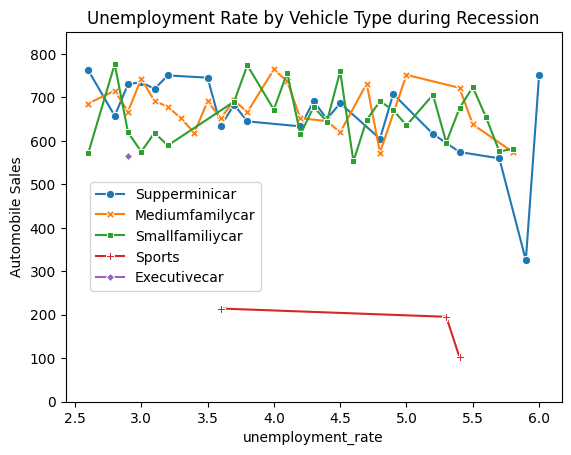

In [24]:
df_rec = df[df['Recession'] == 1]

sns.lineplot(
    data=df_rec,
    x='unemployment_rate',
    y='Automobile_Sales',
    hue='Vehicle_Type',
    style='Vehicle_Type',
    markers=True,
    dashes=False,
    err_style=None
)

plt.ylim(0, 850)
plt.xlabel("unemployment_rate")
plt.ylabel("Automobile Sales")
plt.title("Unemployment Rate by Vehicle Type during Recession")
plt.legend(loc=(0.05, .3))
plt.show()


### OPTIONAL : TASK 1.10 Create a map on the hightest sales region/offices of the company during recession period


In [21]:
import requests

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/us-states.json"
filename = "us-states.json"

# Download file
response = requests.get(url)
if response.status_code == 200:
    with open(filename, "wb") as f:
        f.write(response.content)
    print("Download selesai:", filename)
else:
    print("Gagal download. Status code:", response.status_code)


Download selesai: us-states.json


In [22]:
import folium
import pandas as pd

# Filter data untuk periode resesi
recession_data = df[df['Recession'] == 1]

# Hitung total penjualan per state
sales_by_state = recession_data.groupby('City')['Automobile_Sales'].sum().reset_index()

# Buat peta dasar USA
map1 = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# Tambahkan choropleth
choropleth = folium.Choropleth(
    geo_data='us-states.json',  # GeoJSON untuk batas negara bagian
    data=sales_by_state,
    columns=['City', 'Automobile_Sales'],
    key_on='feature.properties.name',  # "name" harus cocok dengan nama state di JSON
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Automobile Sales during Recession'
).add_to(map1)

# Tambahkan tooltip
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['name'], labels=True)
)

map1
